## Part I: On-policy learning and SARSA (3 points)

_This notebook builds upon `qlearning.ipynb`, or to be exact, generating qlearning.py._

The policy we're gonna use is epsilon-greedy policy, where agent takes optimal action with probability $(1-\epsilon)$, otherwise samples action at random. Note that agent __can__ occasionally sample optimal action during random sampling by pure chance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

Now you can use code, generated from seminar seminar_qlearning.ipynb. Or just copy&paste it.


In [2]:
%%writefile qlearning.py
from collections import defaultdict
import random
import math
import numpy as np


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value
        !!!Important!!!
        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        return max([self.get_qvalue(state, action) for action in possible_actions])

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        reference_qvalue = reward + gamma * self.get_value(next_state)
        updated_qvalue = learning_rate*reference_qvalue + (1 - learning_rate) * self.get_qvalue(state, action)

        self.set_qvalue(state, action, updated_qvalue)

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values). 
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        best_action = max(possible_actions, key=lambda action: self.get_qvalue(state, action))

        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.  
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: To pick randomly from a list, use random.choice(list). 
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        action = None

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # agent parameters:
        epsilon = self.epsilon

        if random.random() < epsilon:
            return random.choice(possible_actions)
        else:
            return self.get_best_action(state)

Overwriting qlearning.py


In [3]:

from qlearning import QLearningAgent

class SarsaAgent(QLearningAgent):
    """ 
    An agent that changes some of q-learning functions to implement Expected Value SARSA. 
    Note: this demo assumes that your implementation of QLearningAgent.update uses get_value(next_state).
    If it doesn't, please add
        def update(self, state, action, reward, next_state):
            and implement it for Expected Value SARSA's V(s')
    """

    def get_value(self, next_state):
        """ 
        Returns Vpi for current state under epsilon-greedy policy:
          V_{pi}(s) = sum _{over a_i} {pi(a_i | s) * Q(s, a_i)}

        Hint: all other methods from QLearningAgent are still accessible.
        """
        epsilon = self.epsilon
        possible_actions = self.get_legal_actions(next_state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0
        next_action = self.get_action(next_state)
        return self.get_qvalue(next_state, next_action)



# Taxi for simple SARSA 

In [4]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

In [5]:
agent = SarsaAgent(alpha=0.05, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

In [6]:
def play_and_train(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
        agent.update( s, 
                      a, 
                      r, 
                      next_s)
        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

eps = 0.2475 mean reward = -515.0


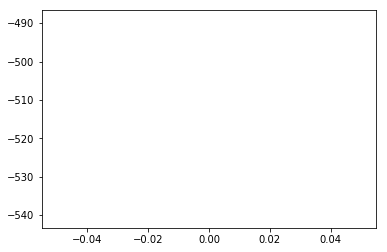

eps = 1.0684883734137816e-05 mean reward = -35.1


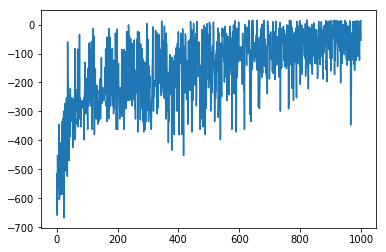

eps = 4.612797592405776e-10 mean reward = -3.0


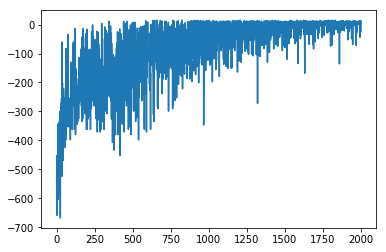

eps = 1.991402261170369e-14 mean reward = 9.5


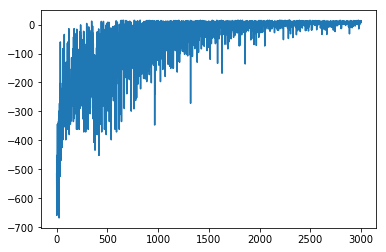

eps = 8.597131971112956e-19 mean reward = 7.6


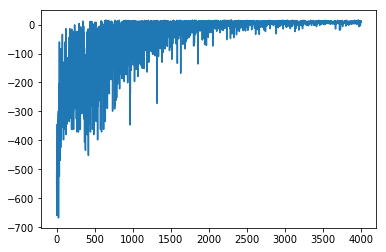

eps = 3.7114891134699343e-23 mean reward = 9.0


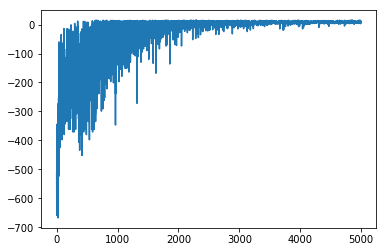

eps = 1.6022961477957392e-27 mean reward = 8.3


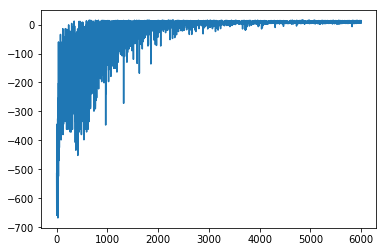

eps = 6.917312342163382e-32 mean reward = 9.1


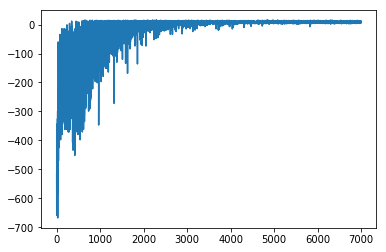

eps = 2.986290025403325e-36 mean reward = 7.7


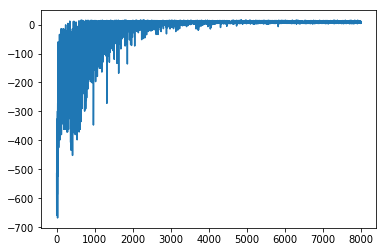

eps = 1.2892186552666647e-40 mean reward = 8.4


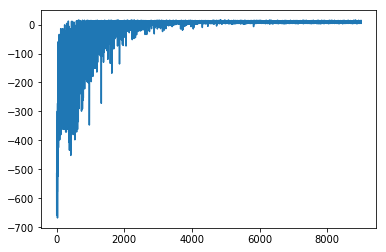

In [7]:
from IPython.display import clear_output

rewards = []
for i in range(10000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 1000 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

In [8]:
from qlearning import QLearningAgent

class EVSarsaAgent(QLearningAgent):
    """ 
    An agent that changes some of q-learning functions to implement Expected Value SARSA. 
    Note: this demo assumes that your implementation of QLearningAgent.update uses get_value(next_state).
    If it doesn't, please add
        def update(self, state, action, reward, next_state):
            and implement it for Expected Value SARSA's V(s')
    """

    def get_value(self, next_state):
        """ 
        Returns Vpi for current state under epsilon-greedy policy:
          V_{pi}(s) = sum _{over a_i} {pi(a_i | s) * Q(s, a_i)}

        Hint: all other methods from QLearningAgent are still accessible.
        """
        epsilon = self.epsilon
        possible_actions = self.get_legal_actions(next_state)
        
        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0
        sumRandom = epsilon * sum(self.get_qvalue(next_state, action) for action in possible_actions) / len(possible_actions)
        totalExpected = sumRandom + (1-epsilon) * self.get_qvalue(next_state, self.get_action(next_state))
        return totalExpected



In [21]:
agent = EVSarsaAgent(alpha=0.05, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

In [22]:
def play_and_train(env, agent, t_max=10**4):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s.
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # train (update) agent for state s
        agent.update( s, 
                      a, 
                      r, 
                      next_s)
        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

eps = 0.2475 mean reward = -596.0


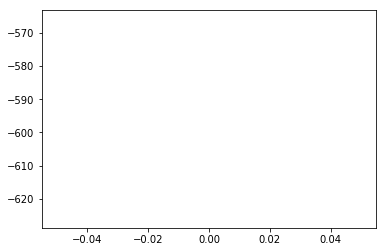

eps = 1.0684883734137816e-05 mean reward = -37.3


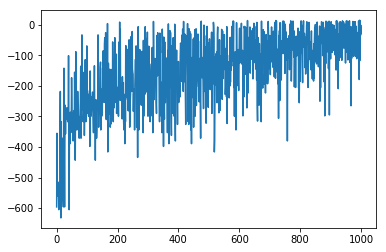

eps = 4.612797592405776e-10 mean reward = 2.4


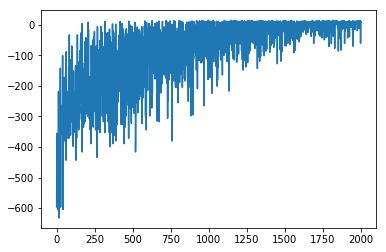

eps = 1.991402261170369e-14 mean reward = 5.3


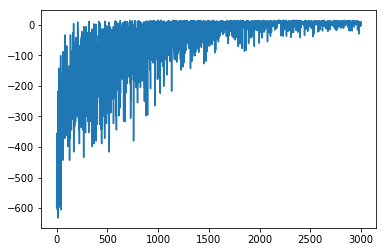

eps = 8.597131971112956e-19 mean reward = 9.0


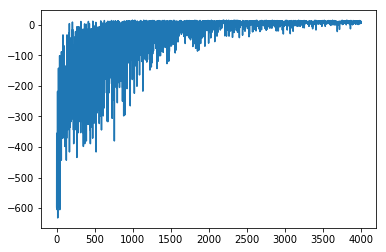

eps = 3.7114891134699343e-23 mean reward = 8.7


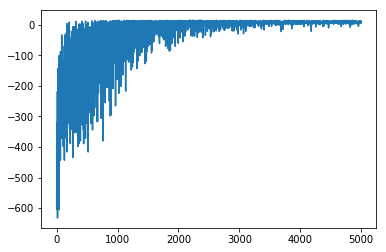

eps = 1.6022961477957392e-27 mean reward = 8.4


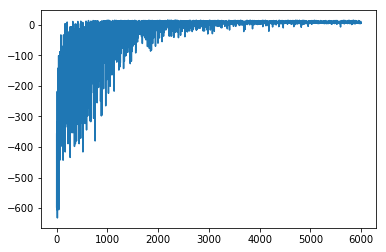

eps = 6.917312342163382e-32 mean reward = 8.0


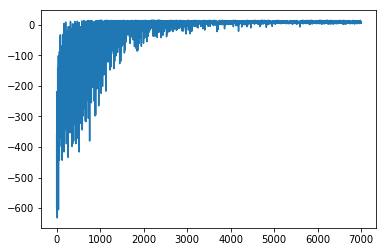

eps = 2.986290025403325e-36 mean reward = 8.6


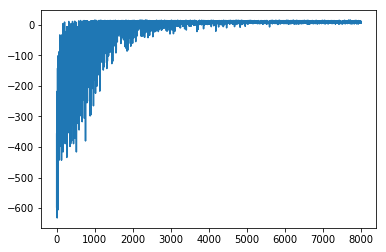

eps = 1.2892186552666647e-40 mean reward = 8.9


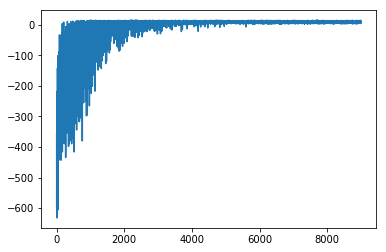

In [23]:
from IPython.display import clear_output

rewards = []
for i in range(10000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 1000 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()


#Cliff World

Let's now see how our algorithm compares against q-learning in case where we force agent to explore all the time.

In [24]:
import gym
import gym.envs.toy_text
env = gym.envs.toy_text.CliffWalkingEnv()
n_actions = env.action_space.n

print(env.__doc__)


    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.

    Adapted from Example 6.6 (page 106) from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://incompleteideas.net/book/bookdraft2018jan1.pdf

    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py

    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center

    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward
    and a reset to the start. An episode terminates when the agent reaches the goal.
    


In [25]:
# Our cliffworld has one difference from what's on the image: there is no wall.
# Agent can choose to go as close to the cliff as it wishes. x:start, T:exit, C:cliff, o: flat ground
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [26]:

def play_and_train(env, agent, t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)
        agent.update(s, a, r, next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward



In [27]:
from qlearning import QLearningAgent

agent_sarsa = EVSarsaAgent(alpha=0.25, epsilon=0.2, discount=0.99,
                           get_legal_actions=lambda s: range(n_actions))

agent_ql = QLearningAgent(alpha=0.25, epsilon=0.2, discount=0.99,
                          get_legal_actions=lambda s: range(n_actions))



EVSARSA mean reward = -54.0
QLEARNING mean reward = -369.0


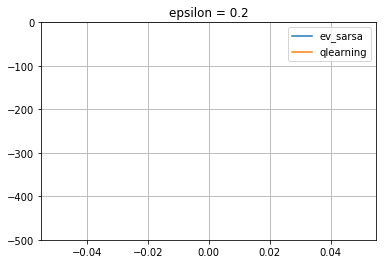

EVSARSA mean reward = -81.42
QLEARNING mean reward = -164.62


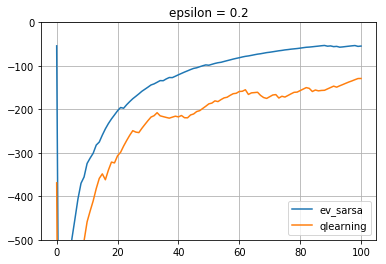

EVSARSA mean reward = -37.22
QLEARNING mean reward = -88.5


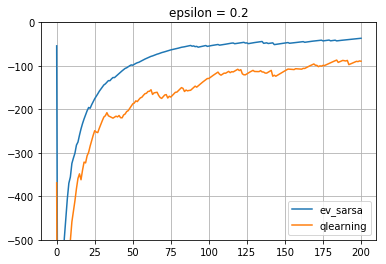

EVSARSA mean reward = -32.66
QLEARNING mean reward = -96.1


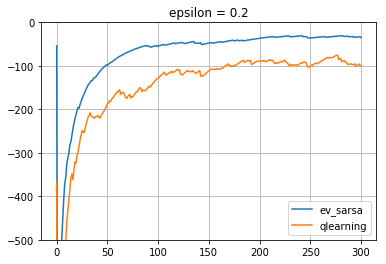

EVSARSA mean reward = -29.13
QLEARNING mean reward = -102.29


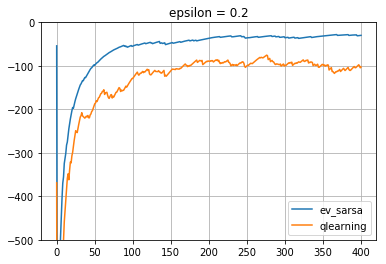

EVSARSA mean reward = -31.54
QLEARNING mean reward = -101.12


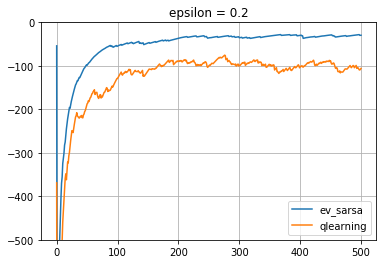

EVSARSA mean reward = -26.06
QLEARNING mean reward = -105.84


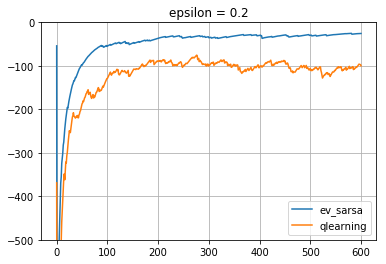

EVSARSA mean reward = -31.74
QLEARNING mean reward = -120.15


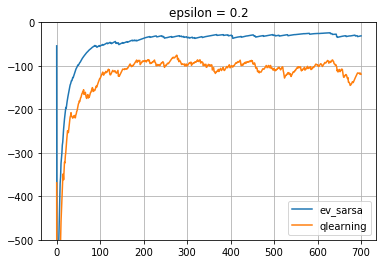

EVSARSA mean reward = -32.97
QLEARNING mean reward = -110.7


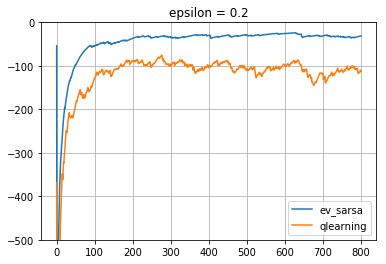

EVSARSA mean reward = -31.97
QLEARNING mean reward = -109.29


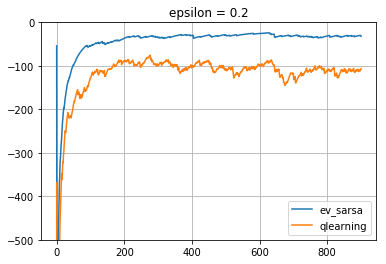

EVSARSA mean reward = -35.21
QLEARNING mean reward = -104.74


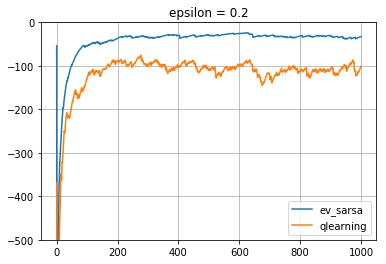

EVSARSA mean reward = -27.24
QLEARNING mean reward = -108.26


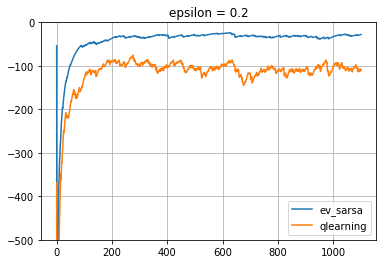

EVSARSA mean reward = -27.99
QLEARNING mean reward = -104.01


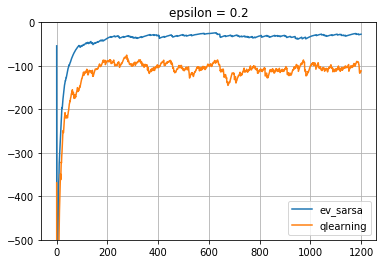

EVSARSA mean reward = -29.98
QLEARNING mean reward = -95.6


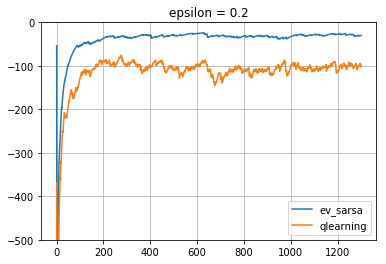

EVSARSA mean reward = -25.73
QLEARNING mean reward = -117.37


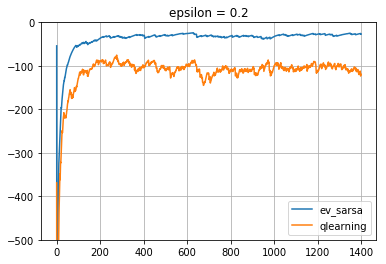

EVSARSA mean reward = -33.22
QLEARNING mean reward = -111.14


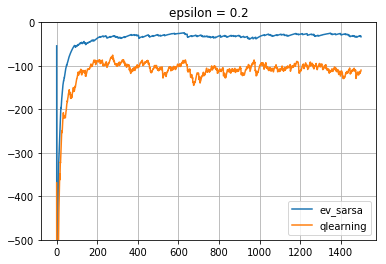

EVSARSA mean reward = -27.86
QLEARNING mean reward = -91.4


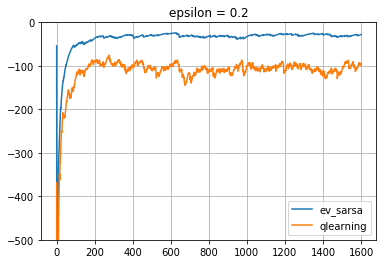

EVSARSA mean reward = -26.39
QLEARNING mean reward = -83.98


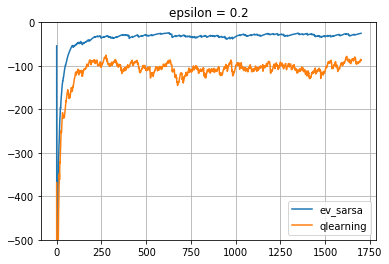

EVSARSA mean reward = -27.03
QLEARNING mean reward = -121.48


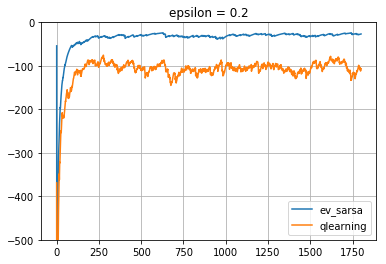

EVSARSA mean reward = -33.9
QLEARNING mean reward = -103.37


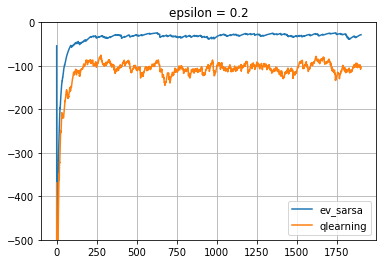

EVSARSA mean reward = -30.06
QLEARNING mean reward = -76.6


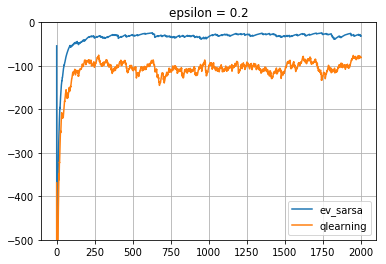

EVSARSA mean reward = -25.19
QLEARNING mean reward = -87.39


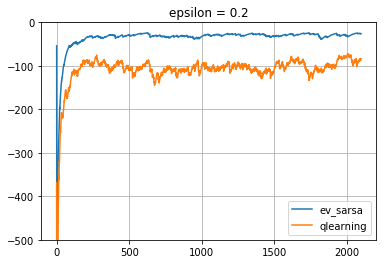

EVSARSA mean reward = -28.64
QLEARNING mean reward = -97.7


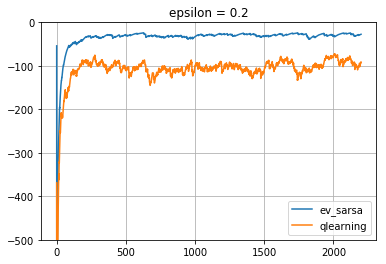

EVSARSA mean reward = -30.33
QLEARNING mean reward = -87.12


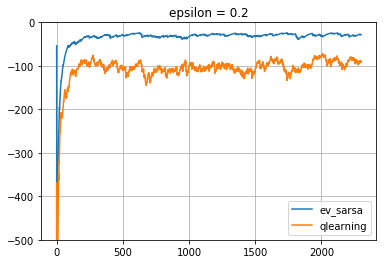

EVSARSA mean reward = -28.22
QLEARNING mean reward = -73.33


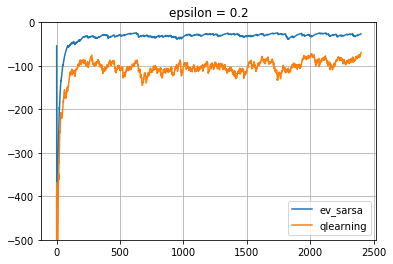

EVSARSA mean reward = -27.83
QLEARNING mean reward = -82.04


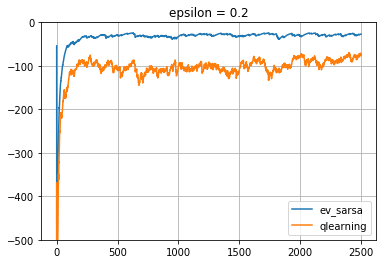

EVSARSA mean reward = -33.31
QLEARNING mean reward = -96.54


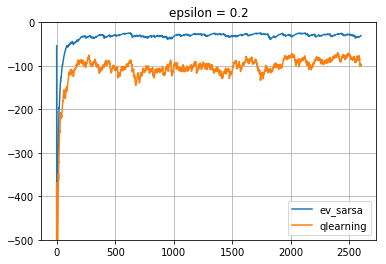

EVSARSA mean reward = -37.15
QLEARNING mean reward = -71.95


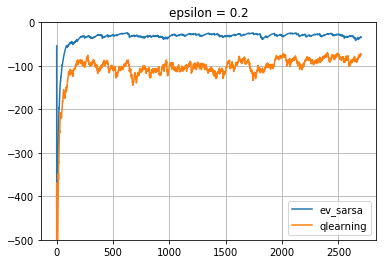

EVSARSA mean reward = -27.29
QLEARNING mean reward = -76.9


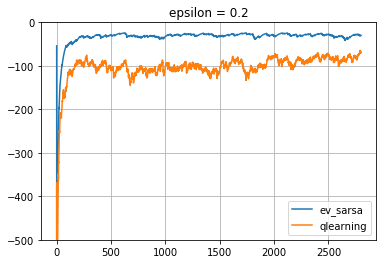

EVSARSA mean reward = -25.52
QLEARNING mean reward = -84.92


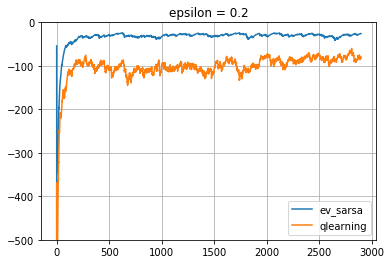

EVSARSA mean reward = -30.61
QLEARNING mean reward = -88.78


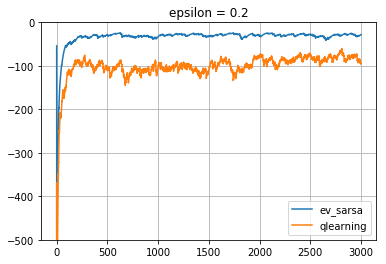

EVSARSA mean reward = -32.64
QLEARNING mean reward = -91.91


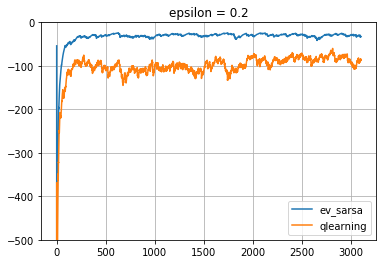

EVSARSA mean reward = -24.98
QLEARNING mean reward = -74.33


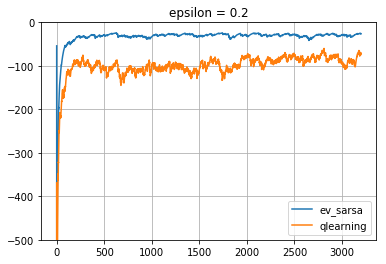

EVSARSA mean reward = -31.86
QLEARNING mean reward = -67.84


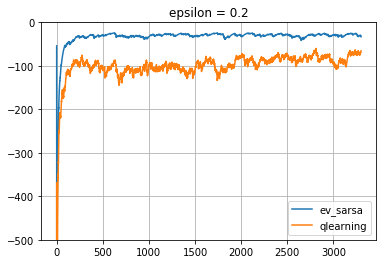

EVSARSA mean reward = -42.11
QLEARNING mean reward = -94.12


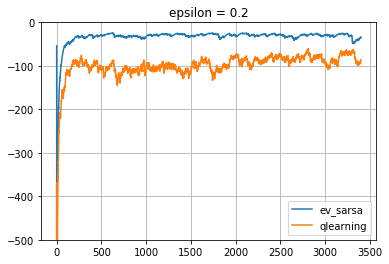

EVSARSA mean reward = -35.98
QLEARNING mean reward = -82.68


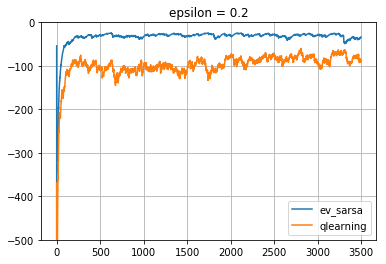

EVSARSA mean reward = -27.2
QLEARNING mean reward = -80.24


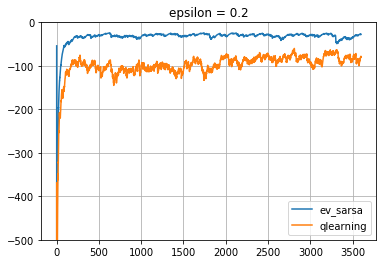

EVSARSA mean reward = -33.81
QLEARNING mean reward = -78.75


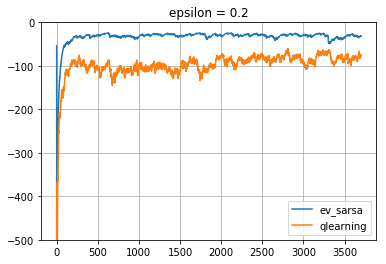

EVSARSA mean reward = -26.31
QLEARNING mean reward = -88.54


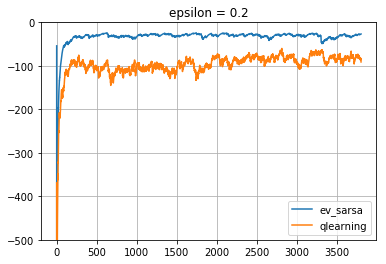

EVSARSA mean reward = -22.93
QLEARNING mean reward = -67.92


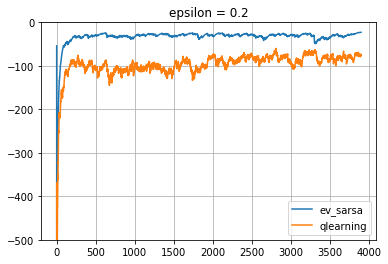

EVSARSA mean reward = -33.77
QLEARNING mean reward = -76.86


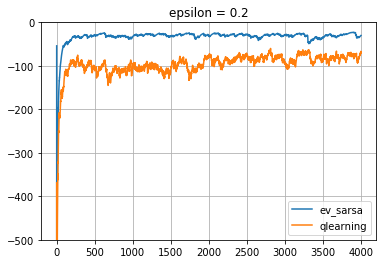

EVSARSA mean reward = -27.77
QLEARNING mean reward = -87.74


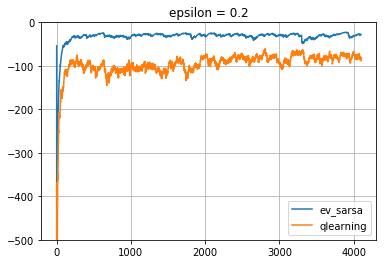

EVSARSA mean reward = -28.43
QLEARNING mean reward = -104.03


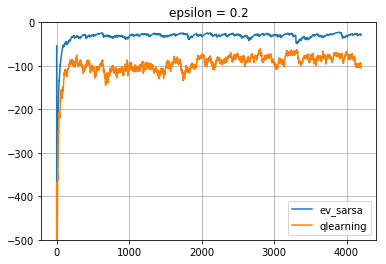

EVSARSA mean reward = -27.91
QLEARNING mean reward = -75.53


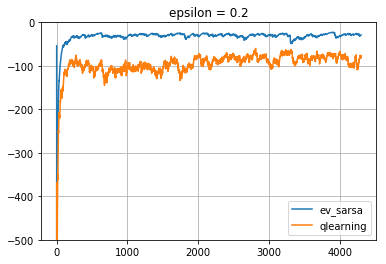

EVSARSA mean reward = -24.53
QLEARNING mean reward = -82.29


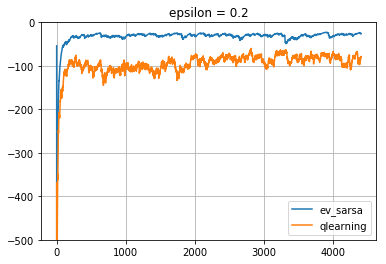

EVSARSA mean reward = -24.82
QLEARNING mean reward = -86.75


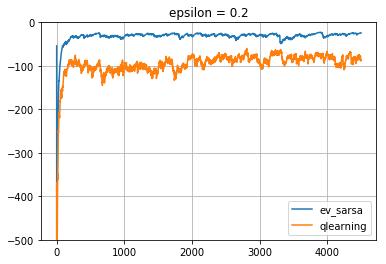

EVSARSA mean reward = -27.12
QLEARNING mean reward = -93.15


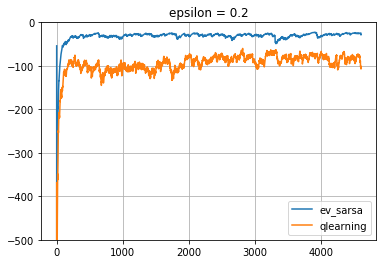

EVSARSA mean reward = -28.04
QLEARNING mean reward = -92.03


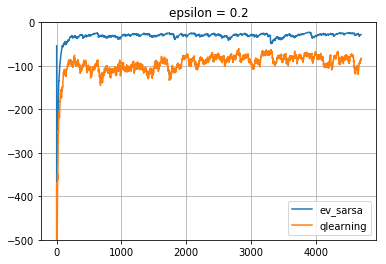

EVSARSA mean reward = -29.58
QLEARNING mean reward = -87.21


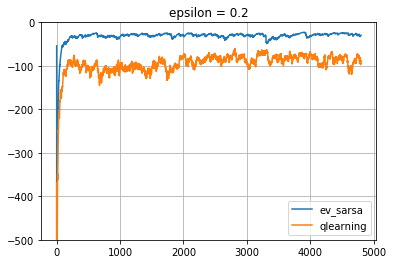

EVSARSA mean reward = -27.23
QLEARNING mean reward = -91.67


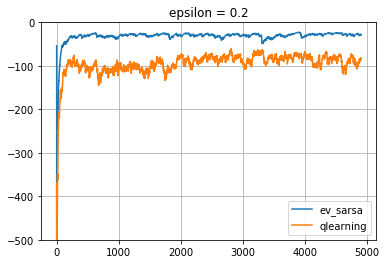

In [28]:
from IPython.display import clear_output
from pandas import DataFrame


def moving_average(x, span=100): return DataFrame(
    {'x': np.asarray(x)}).x.ewm(span=span).mean().values


rewards_sarsa, rewards_ql = [], []

for i in range(5000):
    rewards_sarsa.append(play_and_train(env, agent_sarsa))
    rewards_ql.append(play_and_train(env, agent_ql))
    # Note: agent.epsilon stays constant

    if i % 100 == 0:
        clear_output(True)
        print('EVSARSA mean reward =', np.mean(rewards_sarsa[-100:]))
        print('QLEARNING mean reward =', np.mean(rewards_ql[-100:]))
        plt.title("epsilon = %s" % agent_ql.epsilon)
        plt.plot(moving_average(rewards_sarsa), label='ev_sarsa')
        plt.plot(moving_average(rewards_ql), label='qlearning')
        plt.grid()
        plt.legend()
        plt.ylim(-500, 0)
        plt.show()

Let's now see what did the algorithms learn by visualizing their actions at every state.

In [29]:
def draw_policy(env, agent):
    """ Prints CliffWalkingEnv policy with arrows. Hard-coded. """
    n_rows, n_cols = env._cliff.shape

    actions = '^>v<'

    for yi in range(n_rows):
        for xi in range(n_cols):
            if env._cliff[yi, xi]:
                print(" C ", end='')
            elif (yi * n_cols + xi) == env.start_state_index:
                print(" X ", end='')
            elif (yi * n_cols + xi) == n_rows * n_cols - 1:
                print(" T ", end='')
            else:
                print(" %s " %
                      actions[agent.get_best_action(yi * n_cols + xi)], end='')
        print()

In [30]:
print("Q-Learning")
draw_policy(env, agent_ql)

print("SARSA")
draw_policy(env, agent_sarsa)

Q-Learning
 v  >  v  v  >  >  >  v  >  v  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 >  >  >  >  >  >  >  >  >  >  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 
SARSA
 >  >  >  >  >  >  >  >  >  >  >  v 
 ^  ^  ^  ^  ^  ^  ^  >  ^  ^  >  v 
 ^  ^  ^  ^  ^  ^  ^  ^  ^  ^  >  v 
 X  C  C  C  C  C  C  C  C  C  C  T 


### More on SARSA

Here are some of the things you can do if you feel like it:

* Play with epsilon. See learned how policies change if you set epsilon to higher/lower values (e.g. 0.75).
* Expected Value SASRSA for softmax policy __(2pts)__:
$$ \pi(a_i|s) = softmax({Q(s,a_i) \over \tau}) = {e ^ {Q(s,a_i)/ \tau}  \over {\sum_{a_j}  e ^{Q(s,a_j) / \tau }}} $$
* Implement N-step algorithms and TD($\lambda$): see [Sutton's book](http://incompleteideas.net/book/bookdraft2018jan1.pdf) chapter 7 and chapter 12.
* Use those algorithms to train on CartPole in previous / next assignment for this week.

## Part II: experience replay (4 points)

There's a powerful technique that you can use to improve sample efficiency for off-policy algorithms: [spoiler] Experience replay :)

The catch is that you can train Q-learning and EV-SARSA on `<s,a,r,s'>` tuples even if they aren't sampled under current agent's policy. So here's what we're gonna do:

<img src=https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/exp_replay.png width=480>

#### Training with experience replay
1. Play game, sample `<s,a,r,s'>`.
2. Update q-values based on `<s,a,r,s'>`.
3. Store `<s,a,r,s'>` transition in a buffer. 
 3. If buffer is full, delete earliest data.
4. Sample K such transitions from that buffer and update q-values based on them.


To enable such training, first we must implement a memory structure that would act like such a buffer.

In [31]:
# In google collab, uncomment this:
# !wget https://bit.ly/2FMJP5K -q -O setup.py
# !bash setup.py 2>&1 1>stdout.log | tee stderr.log

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import random


class ReplayBuffer(object):
    def __init__(self, size):
        """
        Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.

        Note: for this assignment you can pick any data structure you want.
              If you want to keep it simple, you can store a list of tuples of (s, a, r, s') in self._storage
              However you may find out there are faster and/or more memory-efficient ways to do so.
        """
        self._storage = []
        self._maxsize = size

        # OPTIONAL: YOUR CODE

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize. 
        Make sure, FIFO rule is being followed: the oldest examples has to be removed earlier
        '''
        data = (obs_t, action, reward, obs_tp1, done)

        # add data to storage
        if len(self._storage) == self._maxsize:
            self._storage.pop(0)
        self._storage.append(data)

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """
        idxes = [random.randint(0, len(self._storage)-1) for _ in range(batch_size)]
        # collect <s,a,r,s',done> for each index
        obs_batch = [self._storage[i][0] for i in idxes]
        act_batch = [self._storage[i][1] for i in idxes]
        rew_batch = [self._storage[i][2] for i in idxes]
        next_obs_batch = [self._storage[i][3] for i in idxes]
        done_mask = [self._storage[i][4] for i in idxes]
        
        return np.array(obs_batch), np.array(act_batch), np.array(rew_batch), np.array(next_obs_batch), np.array(done_mask)


Some tests to make sure your buffer works right

In [56]:
def obj2arrays(obj):
    for x in obj:
        yield np.array([x])

def obj2sampled(obj):
    return tuple(obj2arrays(obj))

replay = ReplayBuffer(2)
obj1 = (0, 1, 2, 3, True)
obj2 = (4, 5, 6, 7, False)
replay.add(*obj1)
assert replay.sample(
    1) == obj2sampled(obj1), "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay) == 2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay) == 2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100)) == obj2sampled(obj2)
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100)) == 2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100)) == obj2sampled(obj1)
print("Success!")

Success!


Now let's use this buffer to improve training:

In [57]:
import gym
from qlearning import QLearningAgent

env = gym.make("Taxi-v2")
n_actions = env.action_space.n

In [58]:
def play_and_train_with_replay(env, agent, replay=None,
                               t_max=10**4, replay_batch_size=32):
    """
    This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward
    :param replay: ReplayBuffer where agent can store and sample (s,a,r,s',done) tuples.
        If None, do not use experience replay
    """
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s
        a = agent.get_action(s)

        next_s, r, done, _ = env.step(a)

        # update agent on current transition. Use agent.update
        agent.update(s, a, r, next_s)

        if replay is not None:
            # store current <s,a,r,s'> transition in buffer
            replay.add (s, a, r, next_s, done)

            # sample replay_batch_size random transitions from replay,
            # then update agent on each of them in a loop
            s_, a_, r_, next_s_, done_ = replay.sample(replay_batch_size)
            for i in range(replay_batch_size):
                agent.update(s_[i], a_[i], r_[i], next_s_[i])

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward



In [59]:
# Create two agents: first will use experience replay, second will not.

agent_baseline = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                                get_legal_actions=lambda s: range(n_actions))

agent_replay = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                              get_legal_actions=lambda s: range(n_actions))

replay = ReplayBuffer(1000)

Baseline : eps = 0.2475 mean reward = -578.0
ExpReplay: eps = 0.2475 mean reward = -569.0


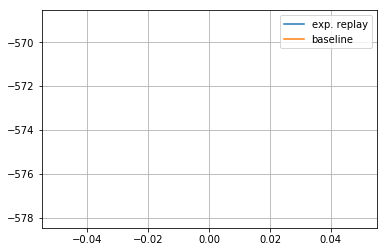

Baseline : eps = 0.09059300446512424 mean reward = -144.0
ExpReplay: eps = 0.09059300446512424 mean reward = -5.6


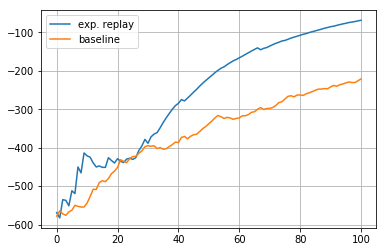

Baseline : eps = 0.03315996952734553 mean reward = -54.4
ExpReplay: eps = 0.03315996952734553 mean reward = 2.9


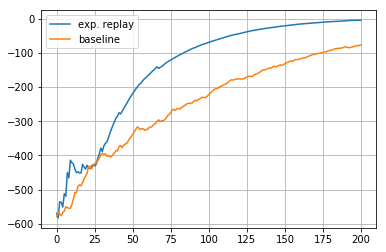

Baseline : eps = 0.012137621282643224 mean reward = 3.5
ExpReplay: eps = 0.012137621282643224 mean reward = 8.5


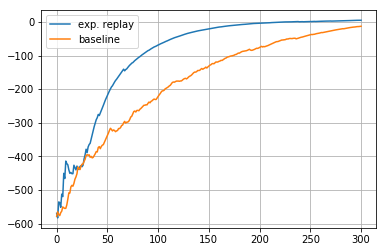

Baseline : eps = 0.0044427619355736706 mean reward = 6.2
ExpReplay: eps = 0.0044427619355736706 mean reward = 8.1


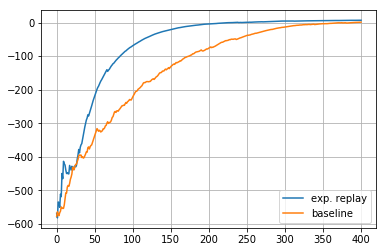

Baseline : eps = 0.0016261945529976148 mean reward = 5.5
ExpReplay: eps = 0.0016261945529976148 mean reward = 6.9


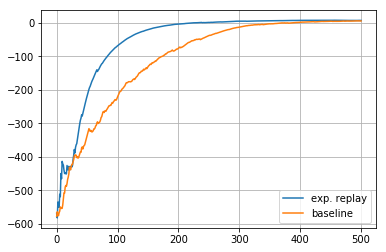

Baseline : eps = 0.0005952397995994891 mean reward = 9.0
ExpReplay: eps = 0.0005952397995994891 mean reward = 5.8


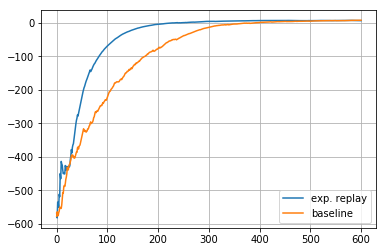

Baseline : eps = 0.00021787701746640883 mean reward = 5.8
ExpReplay: eps = 0.00021787701746640883 mean reward = 7.3


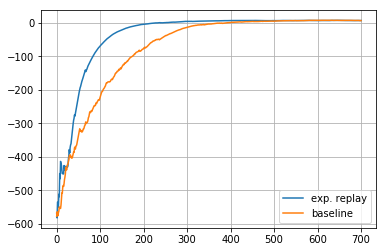

Baseline : eps = 7.975003481285784e-05 mean reward = 4.8
ExpReplay: eps = 7.975003481285784e-05 mean reward = 7.6


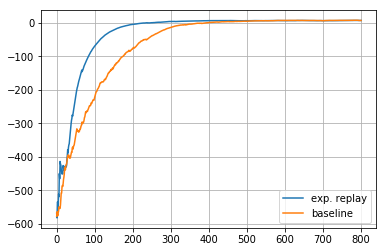

Baseline : eps = 2.9191091959171894e-05 mean reward = 7.7
ExpReplay: eps = 2.9191091959171894e-05 mean reward = 7.6


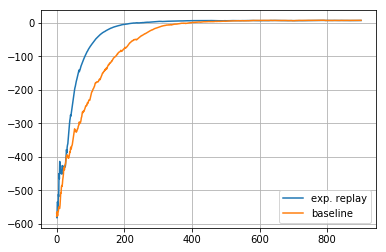

In [60]:
from IPython.display import clear_output

rewards_replay, rewards_baseline = [], []

for i in range(1000):
    rewards_replay.append(
        play_and_train_with_replay(env, agent_replay, replay))
    rewards_baseline.append(play_and_train_with_replay(
        env, agent_baseline, replay=None))

    agent_replay.epsilon *= 0.99
    agent_baseline.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        print('Baseline : eps =', agent_replay.epsilon,
              'mean reward =', np.mean(rewards_baseline[-10:]))
        print('ExpReplay: eps =', agent_baseline.epsilon,
              'mean reward =', np.mean(rewards_replay[-10:]))
        plt.plot(moving_average(rewards_replay), label='exp. replay')
        plt.plot(moving_average(rewards_baseline), label='baseline')
        plt.grid()
        plt.legend()
        plt.show()